In [2]:
import pandas as pd
import numpy as np
import io
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

df_rain = pd.read_csv('Hourly-Rainfall.csv')
print("*********Rainfall Data*********")
print(df_rain,"\n\n")

df_river = pd.read_csv('Hourly-River-Level.csv')
print("*********Rainfall river**********")
print(df_river,"\n\n")
df = pd.merge(df_rain, df_river, how='outer', on=['Date/Time'])
print("*********On merging them**********")
print(df)

*********Rainfall Data*********
                 Date/Time  Current rainfall (mm)  Cumulative rainfall (mm)
0      2018-12-02 18:00:00                    0.0                       0.0
1      2018-12-02 17:00:00                    0.0                       0.0
2      2018-12-02 16:00:00                    0.0                       0.0
3      2018-12-02 15:00:00                    0.0                       0.0
4      2018-12-02 14:00:00                    0.0                       0.0
...                    ...                    ...                       ...
78843  2009-12-01 04:00:00                    0.0                       0.2
78844  2009-12-01 03:00:00                    0.0                       0.2
78845  2009-12-01 02:00:00                    0.0                       0.2
78846  2009-12-01 01:00:00                    0.0                       0.2
78847  2009-12-01 00:00:00                    0.0                       0.2

[78848 rows x 3 columns] 


*********Rainfall river****

In [3]:
df['Date/Time'] = pd.to_datetime(df['Date/Time'], format='%Y-%m-%d %H:%M:%S')
df.set_index('Date/Time', inplace=True)

df['Hour'] = df.index.hour
df['Day'] = df.index.day
df['Month'] = df.index.month
df['Year'] = df.index.year

In [4]:
df = df.drop(columns=['Current rainfall (mm)'])
print(df)

                     Cumulative rainfall (mm)  Level (m)  Hour  Day  Month  \
Date/Time                                                                    
2018-12-02 18:00:00                       0.0        NaN    18    2     12   
2018-12-02 17:00:00                       0.0       1.61    17    2     12   
2018-12-02 16:00:00                       0.0       1.61    16    2     12   
2018-12-02 15:00:00                       0.0       1.62    15    2     12   
2018-12-02 14:00:00                       0.0       1.63    14    2     12   
...                                       ...        ...   ...  ...    ...   
2009-12-01 04:00:00                       0.2        NaN     4    1     12   
2009-12-01 03:00:00                       0.2        NaN     3    1     12   
2009-12-01 02:00:00                       0.2        NaN     2    1     12   
2009-12-01 01:00:00                       0.2        NaN     1    1     12   
2009-12-01 00:00:00                       0.2        NaN     0  

In [5]:
df = df.fillna(0)
print(df)

                     Cumulative rainfall (mm)  Level (m)  Hour  Day  Month  \
Date/Time                                                                    
2018-12-02 18:00:00                       0.0       0.00    18    2     12   
2018-12-02 17:00:00                       0.0       1.61    17    2     12   
2018-12-02 16:00:00                       0.0       1.61    16    2     12   
2018-12-02 15:00:00                       0.0       1.62    15    2     12   
2018-12-02 14:00:00                       0.0       1.63    14    2     12   
...                                       ...        ...   ...  ...    ...   
2009-12-01 04:00:00                       0.2       0.00     4    1     12   
2009-12-01 03:00:00                       0.2       0.00     3    1     12   
2009-12-01 02:00:00                       0.2       0.00     2    1     12   
2009-12-01 01:00:00                       0.2       0.00     1    1     12   
2009-12-01 00:00:00                       0.2       0.00     0  

In [6]:
X = df.drop(columns=['Level (m)'])
y = df['Level (m)']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [7]:
rf = RandomForestRegressor(n_estimators=100, random_state=0)
rf.fit(X_train, y_train)

RandomForestRegressor(random_state=0)

In [8]:
y_pred = rf.predict(X_test)

In [9]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("Coefficient of Determination (R²):", r2)

Mean Squared Error: 0.0007736363792010146
Coefficient of Determination (R²): 0.9422246058761702


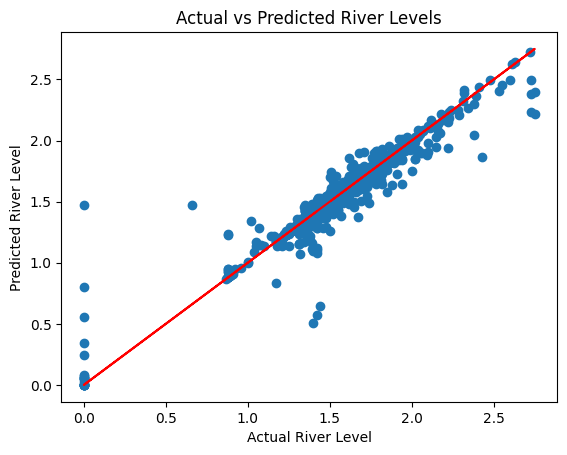

In [10]:
plt.scatter(y_test, y_pred)
plt.plot(y_test, y_test, color='red')
plt.title('Actual vs Predicted River Levels')
plt.xlabel('Actual River Level')
plt.ylabel('Predicted River Level')
plt.show()

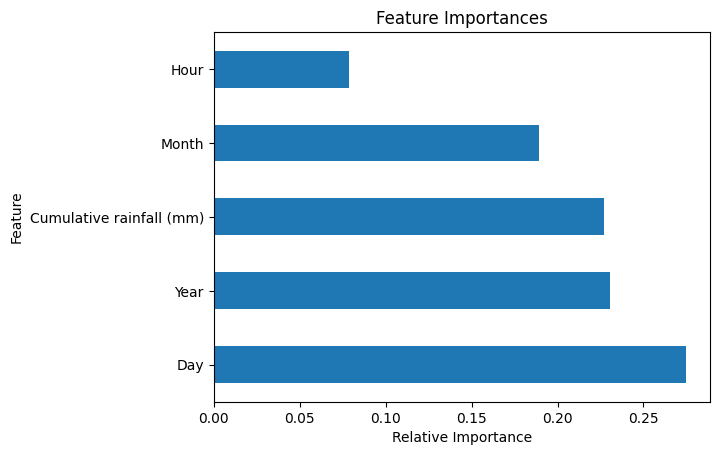

In [11]:
feature_importances = pd.Series(rf.feature_importances_, index=X.columns)
feature_importances.nlargest(10).plot(kind='barh')
plt.title('Feature Importances')
plt.xlabel('Relative Importance')
plt.ylabel('Feature')
plt.show()

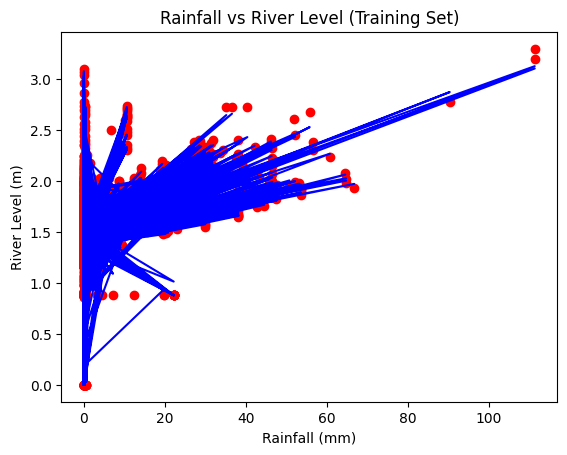

In [12]:
plt.scatter(X_train['Cumulative rainfall (mm)'], y_train, color='red')
plt.plot(X_train['Cumulative rainfall (mm)'], rf.predict(X_train), color='blue')
plt.title('Rainfall vs River Level (Training Set)')
plt.xlabel('Rainfall (mm)')
plt.ylabel('River Level (m)')
plt.show()

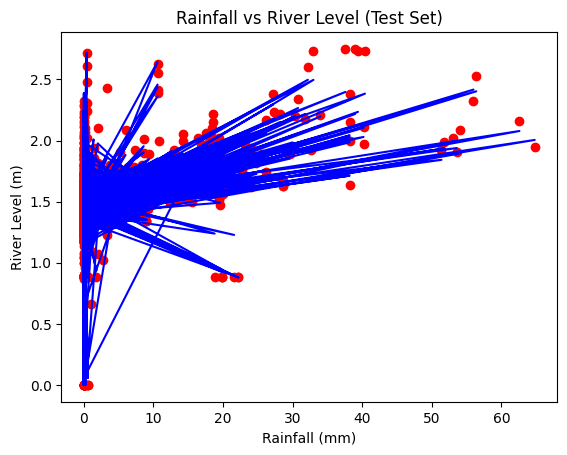

In [13]:
plt.scatter(X_test['Cumulative rainfall (mm)'], y_test, color='red')
plt.plot(X_test['Cumulative rainfall (mm)'], rf.predict(X_test), color='blue')
plt.title('Rainfall vs River Level (Test Set)')
plt.xlabel('Rainfall (mm)')
plt.ylabel('River Level (m)')
plt.show()

In [14]:
Rainfall_Amount = input("Enter the rainfall amount in mm: ")
predicted_riverlevel = rf.predict([[float(Rainfall_Amount), 0, 1, 2023, 0]])
print(predicted_riverlevel)
if (predicted_riverlevel > 1.5):
  print("FLOOD")
else:
  print("No FLOOD")

[1.714]
FLOOD


c:\Python311\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


In [15]:
print("Mean Squared Error:", mse)
print("Coefficient of Determination (R²):", r2)

Mean Squared Error: 0.0007736363792010146
Coefficient of Determination (R²): 0.9422246058761702
